In [39]:
"""
Created on 15th Aug 2020
@author: Shilpa Chavan
Algorithm : Neural Network Algorithm
Dataset : 50_Startups.csv
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Load the Data

In [40]:
startUpData = pd.read_csv("D:\\Shilpa\\Datascience\\Assignments\\Neural Network\\50_Startups.csv")
startUpData.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Exploratory data analysis

In [41]:
startUpData['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [42]:
startUpData.drop(["State"], axis = 1,inplace = True)


In [43]:

X = startUpData.drop(["Profit"],axis=1)
Y = startUpData["Profit"]

(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <a list of 10 Patch objects>)

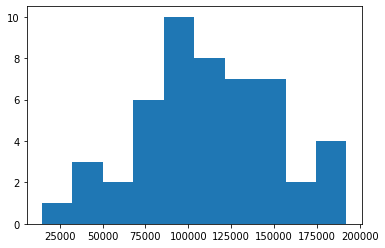

In [44]:
plt.hist(Y)

In [45]:
startUpData.Profit.value_counts()

118474.03    1
69758.98     1
81229.06     1
101004.64    1
124266.90    1
49490.75     1
192261.83    1
71498.49     1
156991.12    1
108733.99    1
78239.91     1
64926.08     1
144259.40    1
108552.04    1
97427.84     1
126992.93    1
105733.54    1
96712.80     1
96479.51     1
134307.35    1
99937.59     1
90708.19     1
182901.99    1
110352.25    1
42559.73     1
146121.95    1
89949.14     1
152211.77    1
35673.41     1
156122.51    1
166187.94    1
65200.33     1
149759.96    1
155752.60    1
191792.06    1
125370.37    1
107404.34    1
14681.40     1
111313.02    1
81005.76     1
105008.31    1
103282.38    1
132602.65    1
129917.04    1
122776.86    1
96778.92     1
77798.83     1
141585.52    1
191050.39    1
97483.56     1
Name: Profit, dtype: int64

In [46]:
startUpData.astype(int)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349,136897,471784,192261
1,162597,151377,443898,191792
2,153441,101145,407934,191050
3,144372,118671,383199,182901
4,142107,91391,366168,166187
5,131876,99814,362861,156991
6,134615,147198,127716,156122
7,130298,145530,323876,155752
8,120542,148718,311613,152211
9,123334,108679,304981,149759


# Training and Test dataset

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Xtrain=X_train.astype(int)
Xtest=X_test.astype(int)
ytrain=y_train.astype(int)
ytest=y_test.astype(int)

# Model Training and Evaluation

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(30,30))

mlp.fit(Xtrain,ytrain)
prediction_train=mlp.predict(Xtrain)
prediction_test = mlp.predict(Xtest)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [53]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(ytest,prediction_test))
np.mean(ytest==prediction_test)
np.mean(ytrain==prediction_train)

[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0

0.40540540540540543